#  **Project Title: Predicting Track Genre Using Audio Features**

# Business Question:
Can we predict the genre of a track based solely on its audio features?

# Project Objective:
The goal of this project is to develop a machine learning model that classifies Spotify tracks into specific genres using audio features such as danceability, energy, acousticness, tempo, and more.

 By successfully building this model, we aim to help music platforms, producers, or listeners better categorize music and recommend tracks based on similar genres.

# Approach:
We will conduct a thorough analysis of the dataset to understand feature distributions, examine relationships between features, and identify any necessary data cleaning tasks (e.g., handling duplicates, gibberish entries, and other anomalies).

Feature Selection and Engineering: Select the most relevant features and prepare the dataset for training.

We initially tested the model using 5 audio features and 5 music genres, achieving high accuracy (The Random Forest model, in particular, achieved the highest accuracy (0.8) with a Test ROC AUC score of 0.95). Therefore, in the current notebook, we extended the analysis to include all 114 music genres, divided into 10 broad groups.

Model Building: We will test multiple classification algorithms, such as Logistic Regression,  Decision Trees, voting, Random Forests, and XGBoost to predict the genre of the track.

Model Evaluation: We evaluated the models performance using accuracy, precision, recall, AUC ROC.

All models were tested with the original features vs. engineered features to examine the contribution of the feature engineering process to the model accuracy score.

# **Team members**

# Ortal Lasry

# Or Cohen Raviv

## **Table of Contents**

1. **Introduction**

2. **Exploratory Data Analysis (EDA)**

   2.1 **Data Loading and Initial Inspection**  
   2.2 **Data Cleaning**  
       2.2.1 **Grouping `track_genre` into 10 Broader Music Categories**  
   2.3 **EDA and Visualization After Cleaning**  
       2.3.1 **Descriptive Statistics of the Features**  
   2.4 **Feature Engineering and Scaling**

3. **Correlation Analysis**

   3.1 **Model Comparison (Random Forest, SVM, Decision Tree, Logistic Regression)** — *Notebook A*

4. **Model Building**

   4.1 **Logistic Regression Without Feature Engineering**  
       4.1.1 **Logistic Regression With Feature Engineering** (log-transformed, polynomial, and interaction features to improve accuracy)  
   4.2 **Voting Classifier With Original Features**  
       4.2.1 **Voting Classifier With Transformed Features to Increase Accuracy Levels**  
   4.3 **Random Forest Classifier With Original Features**  
       4.3.1 **Model Evaluation for Random Forest: Feature Importance**  
       4.3.2 **ROC AUC for Random Forest**  
       4.3.3 **Random Forest With Transformed Variables**  
       4.3.4 **Model Evaluation for Random Forest With Engineered Features: Feature Importance**  
       4.3.5 **ROC AUC for Random Forest With Engineered Features**  
   4.4 **XGBoost With Engineered Features to Increase Accuracy**  
   4.5 **Voting + Random Forest + XGBoost**

5. **Summarizing Results for All Models: Original Features vs. Engineered Features**


# .1.  **Introduction**


**Data set** used for analysis was found on Kaggle -
https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

# **Spotify Tracks Dataset Description:**

This dataset contains information on Spotify tracks spanning 114 different genres. Each track is described by various audio features and metadata. The dataset can be utilized for:

Building recommendation systems based on user preferences or inputs.
Classification tasks based on audio features and genre categorization.

# **Columns Description:**

**track_id:** The unique Spotify ID for each track.

**artists:** Names of the artists who performed the track, separated by ';'.

**album_name:** The name of the album in which the track appears.

**track_name:** The title of the track.

**popularity:** A value between 0 and 100, indicating the track's popularity based on recent plays.

**duration_ms:** The length of the track in milliseconds.

**explicit:** Boolean indicating whether the track contains explicit content.

**danceability:** Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).

**energy:** Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).

**key:** The musical key of the track mapped using standard Pitch Class notation.

**loudness:** Overall loudness of the track in decibels (dB).

**mode:** Indicates the modality (major or minor) of the track.

**speechiness:** Detects the presence of spoken words in the track.

**acousticness:** Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).

**instrumentalness:** Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).

**liveness:** Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance).

**valence:** Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).

**tempo:** Estimated tempo of the track in beats per minute (BPM).

**time_signature:** Estimated time signature of the track (3 to 7).

Each track is associated with a specific genre labeled under **track_genre**.




# .2. **Exploratory Data Analysis (EDA)**


## 2.1 **Data Loading and Initial Inspection**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import regex as re
import seaborn as sns

In [ ]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id=1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk'

    return path


In [ ]:
import pandas as pd


# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk/view?usp=sharing'

# Generate the direct download link
csv_path1 = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
df = pd.read_csv(csv_path1)

# Display the first few rows to confirm it's loaded correctly
df.head()

# Get an overview of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:

print("~"*100)
# Check for Missing Values
print(df.isna().sum())
#missing values in the following featureas: 'artists', 'album_name','track_name'. Later we will drop the missing values.


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:

#We want to see the min-max values for the different quantitiative features:

for column in df.select_dtypes(include='number').columns:
    print(f"{column} - Min: {df[column].min()}, Max: {df[column].max()}")


#There is a variation in the scale for the different features, Later we will standardized/scale them.


popularity - Min: 0, Max: 100
duration_ms - Min: 0, Max: 5237295
danceability - Min: 0.0, Max: 0.985
energy - Min: 0.0, Max: 1.0
key - Min: 0, Max: 11
loudness - Min: -49.531, Max: 4.532
mode - Min: 0, Max: 1
speechiness - Min: 0.0, Max: 0.965
acousticness - Min: 0.0, Max: 0.996
instrumentalness - Min: 0.0, Max: 1.0
liveness - Min: 0.0, Max: 1.0
valence - Min: 0.0, Max: 0.995
tempo - Min: 0.0, Max: 243.372
time_signature - Min: 0, Max: 5


In [ ]:
df['explicit'].value_counts() #Less then 10% of the df has explicit=TRUE(bad words/not for children)

explicit
False    104253
True       9747
Name: count, dtype: int64

In [ ]:
# Check if the 'explicit' column contains any non-boolean values
non_bool_values = ~df['explicit'].isin([True, False])

# Display rows with non-boolean values in 'explicit' column
df[non_bool_values]
#There are 0 non-boolean values in explicit

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [ ]:
#Need to change explicit from Boolean type to int for later analytics:
df['explicit'] = df['explicit'].map({True: 1, False: 0})

df['explicit'].unique()




array([0, 1], dtype=int64)

In [ ]:
df['explicit'].value_counts()

explicit
0    104253
1      9747
Name: count, dtype: int64

In [ ]:
# Convert the 'speechiness' column to numeric, setting non-numeric values to NaN
non_numeric_values = pd.to_numeric(df['speechiness'], errors='coerce')

# Check for rows where 'speechiness' contains non-numeric values
non_numeric_rows = df[non_numeric_values.isna()]

# Display rows with non-numeric values in 'speechiness' column
non_numeric_rows


#There are 0 non_numeric_rows in speechiness
df['speechiness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: speechiness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [ ]:

# Same here: Convert the 'loudness' column to numeric, setting non-numeric values to NaN
non_numeric_values2 = pd.to_numeric(df['loudness'], errors='coerce')

# Check for rows where 'loudness' contains non-numeric values
non_numeric_rows2 = df[non_numeric_values2.isna()]

# Display rows with non-numeric values in 'loudness' column
print(non_numeric_rows2)
df['loudness'].info()


Empty DataFrame
Columns: [track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []
<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: loudness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [ ]:

# Convert the 'tempo' column to numeric type
df['tempo'] = pd.to_numeric(df['tempo'])

# Convert the 'valence' column to numeric type
df['valence'] = pd.to_numeric(df['valence'])

In [ ]:


# Convert the 'popularity' column to numeric type because of NaN types recognized in this column
df['popularity'] = pd.to_numeric(df['popularity'])

df['popularity'].isnull().sum()



0

In [ ]:

######## looking for missing values-we saw in the info that there are missing values in the folowing variables:
# 'album_name', 'artists',  'track_name'. We want to see how many missing values in each feature:


column_name = 'album_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)



column_name = 'artists'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########
# Specify the column you are interested in
column_name = 'track_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########

#We will drop them in the data cleaning




Indices with missing values in column 'album_name':
[65900]
Indices with missing values in column 'artists':
[65900]
Indices with missing values in column 'track_name':
[65900]


## 2.2 **Data cleaning**

Checking duplicates for track_id

In [ ]:

# Check for duplicate values in the 'track_id' column
df[df['track_id'].duplicated(keep=False)]

# 40900 DUPLICATES in track_id#######

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,0,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,0,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,0,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,0,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


In [ ]:
# Find unique track_id values that are duplicated
df['track_id'][df['track_id'].duplicated()].unique()



array(['0CDucx9lKxuCZplLXUz0iX', '2aibwv5hGXSgw7Yru8IYTO',
       '5E30LdtzQTGqRvNd7l6kG5', ..., '71dLJx3qHOTQMTvvoE2dmd',
       '6OG5TBCmuTOuWCzSGsETrE', '7xsirhcgFWOnItsGuBfrv9'], dtype=object)

In [ ]:

#We want to see how many duplicates there are in the track_id
#  Get the count of all track_ids
track_id_counts = df['track_id'].value_counts()

# Filter out track_ids that appear more than once (i.e., duplicates)
duplicated_track_id_summary = track_id_counts[track_id_counts > 1]

# Display the count of duplicated track_ids
print(duplicated_track_id_summary)

#16641 number of unique track_ids that have duplicates

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
                         ..
2a05MFdR1vtm8QVKFs1SGn    2
2BJdsyqP0IfOt0GR2a6zJl    2
7oyFihJppZYPP7o0NfoHnZ    2
0oz7Ia8lnWttkXi2TBc1Rd    2
1cbCEtcGU25HvwMrZDPqJy    2
Name: count, Length: 16641, dtype: int64


In [ ]:
# Drop duplicate rows based on the 'track_id' column, keeping only the first occurrence
df_cleaned = df.drop_duplicates(subset=['track_id'], keep='first')

# Check the shape of the cleaned DataFrame to see how many rows remain
print(df_cleaned.shape)
#(89741, 20) rows*colums


# 40900 (All duplicates)- 24,259 (duplicate track_id rows except the first instance of each unique track_id)=16641 (unique track_id)

#114000-24,259= 89741

(89741, 20)


In [ ]:
 # Should return 0 if all duplicates were removed
print(df_cleaned['track_id'].duplicated().sum())


0


In [ ]:
df_cleaned.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Remove rows with missing data
df_cleaned = df.dropna()


In [ ]:


#This part of data cleaning is from the first exercise.
# It is less important becuase in this exercise we are not using 'album_name', 'artists' ,'track_name'.


#####cleanup of jibrish and missing indices album_name column######

# Specify the column you are interested in
column_name = 'album_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'album_name' contains only numbers
numeric_rows = df[df['album_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'album_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['album_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)



#####cleanup of jibrish and missing indices for artists column######


# Specify the column you are interested in
column_name = 'artists'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'artists' contains only numbers
numeric_rows = df[df['artists'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'artists' contains at least one alphabetic character from any language
alphabetic_rows = df[df['artists'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Remove rows with missing data
df_cleaned = df.dropna()

#####cleanup of jibrish and missing indices for track_name column######

# Specify the column you are interested in
column_name = 'track_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'track_name' contains only numbers
numeric_rows = df[df['track_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'track_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['track_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


###### Verify the changes######
print("Cleaned_dataset after cleanup of jibrish and missing indices:")
print("    ")
print(df_cleaned)

print("~"*200)
print("Proving the missing indices have been removed:")
single_row = df_cleaned.loc[65899:65901, :]
print(type(single_row))
print(single_row)

print("~"*200)
print("The first cleanup of the dataframe:")
print(df_cleaned.info())

#######comparing between the original dataset and the first cleaned dataset########

df_original_dataset = pd.read_csv(csv_path1)

# Compare the shape of the datasets
print("comparing between the data shapes before and after cleanup:")
print("Original dataset shape:", df_original_dataset.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

print("~"*200)

# Check the distribution of a key feature (e.g., track_genre)

original_genre_distribution = df_original_dataset['track_genre'].value_counts(normalize=True)
cleaned_genre_distribution = df_cleaned['track_genre'].value_counts(normalize=True)

print("~"*200)
print("Original genre distribution:")
print(original_genre_distribution)

print("Cleaned genre distribution:")
print(cleaned_genre_distribution)

# Compare the mean popularity before and after cleaning

original_mean_popularity = df_original_dataset['popularity'].mean()
cleaned_mean_popularity = df_cleaned['popularity'].mean()

print("~"*200)
print("comparing between the mean popularity before and after cleanup:")
print("Original mean popularity:", original_mean_popularity)
print("Cleaned mean popularity:", cleaned_mean_popularity)

print("~"*200)
print("You can see there is no big change in mean popularity before and after cleanup, meaning the cleanup didn't impact the data.")

######filtering the data from unwanted duplicates######

# Group by 'track_name'
grouped = df_cleaned.groupby('track_name')

# Filter groups where all entries have the same 'artists' string
filtered_groups = grouped.filter(lambda x: len(x['artists'].unique()) == 1)

df = pd.read_csv(csv_path1)
print(df['duration_ms'])

# Convert the 'duration_ms' column to numeric type
df['duration_ms'] = pd.to_numeric(df['duration_ms'])

# Perform aggregation: mean popularity and mean duration
aggregated = filtered_groups.groupby('track_name').agg({
    'popularity': 'mean',
    'duration_ms': 'mean'
}).reset_index()

# Count the number of songs including duplicate songs with same relevant data after agregation of groupby
#This also equals the length of rows in cleaned_dataset.csv
same_name_count = df_cleaned['track_name'].value_counts()

# Count the number of songs with the same name and same artists
same_name_artist_count = df_cleaned.groupby(['track_name', 'artists']).size().reset_index(name='count')

# Save the aggregated DataFrame to a new CSV file
aggregated.to_csv('aggregated_dataset.csv', index=False)
print("~"*100)
print("This is the full aggregated data")
print(aggregated)
print("~"*100)
# Display the results
print("Number of songs with the same name:")
print(same_name_count[same_name_count > 1])  # Show only duplicates
print("~"*100)
print("\nNumber of songs with the same name and same artists:")
print(same_name_artist_count[same_name_artist_count['count'] > 1])  # Show only duplicates

#### Choose a track name (to demonstarte how duplicates of one track_name look like)
track_name_to_check = "La Bachata"
print("~"*100)
# Data before filtering and aggregation
original_data = df_cleaned[df_cleaned['track_name'] == track_name_to_check]
print("Original cleaned Data for a specific song - for demonstration of duplicates before filtering it:")
print(original_data)
print("~"*100)
# Data after filtering and aggregation
aggregated_data = aggregated[aggregated['track_name'] == track_name_to_check]
print("\nAggregated Data of the specific song selected for demonstraion after filtering duplicates:")
print(aggregated_data)

# Function to check for differences in specified columns
def check_differences(group, columns):
    for column in columns:
        if group[column].nunique() > 1:
            return True
    return False

# Columns to check for differences
columns_to_check = [ 'tempo', 'valence', 'popularity']

# Group by 'track_name' and check for differences
same_name_diff = df_cleaned.groupby('track_name').filter(lambda x: check_differences(x, columns_to_check))

# Group by 'track_name' and 'artists' and check for differences
same_name_artist_diff = df_cleaned.groupby(['track_name', 'artists']).filter(lambda x: check_differences(x, columns_to_check))
print("~"*100)
# Display results
print("Songs with the same name that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())
print("~"*100)
print("\nSongs with the same name and same artists that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_artist_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())

# Function to check if all rows have the same values for the specified columns
def check_all_same(group, columns):
    return group[columns].nunique().eq(1).all()

# Columns to check for equality
columns_to_check = ['tempo', 'valence', 'popularity']

# Identify rows to keep (for songs with same name and same artists with different values)
#This are rows with same track_name, meaning duplicates, but with different data, making them unique duplicates.
rows_to_keep = df_cleaned.groupby(['track_name', 'artists']).filter(
    lambda x: not check_all_same(x, columns_to_check)
)
print("~"*100)
# Display the resulting DataFrame
print("rows to keep and add to the cleaned dataset, to create final cleaned csv file:")
print(rows_to_keep)

# Save the resulting DataFrame to a new CSV file
rows_to_keep.to_csv('rows_to_keep_dataset.csv', index=False)

df_cleaned = df_cleaned.groupby('track_name').agg('first').reset_index()
print("~"*100)
# Display the resulting DataFrame
print("Cleaned_dataset after full agregation of duplicates (before filtering them):")
print(df_cleaned)

# Save again the cleaned dataset and now also filtered (after agregation by same track_name)
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("~"*100)
print("Cleaned_dataset after full agregation of duplicates (afterrr filtering them):")
print(df_cleaned)
print("~"*100)

# Get unique track names in rows_to_keep
unique_track_names = rows_to_keep['track_name'].unique()

# Remove all rows with these track names from the original dataset
cleaned_df = df_cleaned[~df_cleaned['track_name'].isin(unique_track_names)]

# Append rows_to_keep to cleaned_df
final_df = pd.concat([cleaned_df, rows_to_keep])
print("~"*100)
# Display the final DataFrame
print("final cleaned dataset:")
print(final_df)

# Save the final DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset.csv', index=False)

Cleaned_dataset after cleanup of jibrish and missing indices:
    
                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
109970  3YuGN3KB1ThbXssueLCuJt           Kyoko Koizumi   
109985  4IGxA3ztKdZdTcFH79Xe9E           Seiko Matsuda   
109986  515BPozxiMm95vvsA6V6En           Seiko Matsuda   
109993  1t0nwk5GRdT3frkWp15qSl          Akina Nakamori   
113856  6XsYJ0dwT2hRzp0Qles78F       Колыбельная-земля   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin A

**These are the columns we want to drop from the DF**

In [ ]:

#In the previous version of the file we contineued with only 5 features but the model was
#too much simple and thus with high level of accuracy. This time we will contineu with 9 features.
columns_to_remove = ['artists', 'album_name', 'track_name', 'popularity', 'mode',
                     'liveness', 'time_signature', 'valence', 'key']
# Remove the columns
final_df = final_df.drop(columns_to_remove, axis=1)
final_df.head()

,track_id,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,track_genre
0,0fROT4kK5oTm8xO8PX6EJF,178533.0,1.0,0.823,0.6120,-7.767,0.2480,0.168,0.00000,142.959,french
1,1hH0t381PIXmUVWyG1Vj3p,151680.0,0.0,0.615,0.3750,-10.362,0.0319,0.482,0.00000,110.720,rockabilly
2,1B45DvGMoFWdbAEUH2qliG,84305.0,0.0,0.553,0.8120,-5.542,0.0558,0.132,0.00001,118.368,kids
3,73lXf5if6MWVWnsgXhK8bd,86675.0,0.0,0.664,0.6110,-8.687,0.0886,0.120,0.00000,118.443,kids
4,0jmz4aHEIBCRgrcV2xEkwB,289133.0,0.0,0.111,0.0568,-28.053,0.0551,0.990,0.69700,169.401,sleep


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87862 entries, 0 to 109986
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          87862 non-null  object 
 1   duration_ms       87862 non-null  float64
 2   explicit          87862 non-null  float64
 3   danceability      87862 non-null  float64
 4   energy            87862 non-null  float64
 5   loudness          87862 non-null  float64
 6   speechiness       87862 non-null  float64
 7   acousticness      87862 non-null  float64
 8   instrumentalness  87862 non-null  float64
 9   tempo             87862 non-null  float64
 10  track_genre       87862 non-null  object 
dtypes: float64(9), object(2)
memory usage: 8.0+ MB


In [ ]:
# Check for duplicate rows across all columns in final_df
duplicates_all_columns = final_df[final_df.duplicated(keep=False)]

# Display the duplicate rows
print("Duplicate rows across all columns:")
print(duplicates_all_columns)

# Count the number of duplicate rows
num_duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
#No duplicates in the final_df####

Duplicate rows across all columns:
Empty DataFrame
Columns: [track_id, duration_ms, explicit, danceability, energy, loudness, speechiness, acousticness, instrumentalness, tempo, track_genre]
Index: []
Number of duplicate rows: 0


In [ ]:
#We want to see all the music geners in the df
print(final_df['track_genre'].unique())


['french' 'rockabilly' 'kids' 'sleep' 'power-pop' 'anime' 'romance'
 'piano' 'german' 'classical' 'show-tunes' 'british' 'ska' 'acoustic'
 'idm' 'hardstyle' 'electronic' 'emo' 'alternative' 'latin' 'punk-rock'
 'j-idol' 'trip-hop' 'country' 'club' 'comedy' 'detroit-techno' 'chill'
 'happy' 'folk' 'honky-tonk' 'opera' 'guitar' 'goth' 'disney' 'new-age'
 'bluegrass' 'mandopop' 'rock' 'rock-n-roll' 'blues' 'death-metal' 'jazz'
 'synth-pop' 'reggae' 'disco' 'industrial' 'garage' 'dub' 'grindcore'
 'dancehall' 'funk' 'j-pop' 'spanish' 'salsa' 'iranian' 'metalcore'
 'alt-rock' 'hip-hop' 'soul' 'k-pop' 'techno' 'house' 'black-metal'
 'chicago-house' 'trance' 'psych-rock' 'pagode' 'j-dance' 'study' 'brazil'
 'world-music' 'hardcore' 'children' 'ambient' 'gospel' 'sertanejo' 'punk'
 'party' 'groove' 'forro' 'afrobeat' 'turkish' 'heavy-metal' 'edm' 'indie'
 'latino' 'hard-rock' 'singer-songwriter' 'cantopop' 'drum-and-bass'
 'minimal-techno' 'indie-pop' 'grunge' 'electro' 'swedish' 'metal'
 'bre

In [ ]:
#We want to see all the music geners in the df
print(final_df['track_genre'].nunique())
#There are 114 different  music geners in the df. This is too much in order to draw insights from the data.


114


C:\Users\User\AppData\Local\Temp\ipykernel_30964\1048366585.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


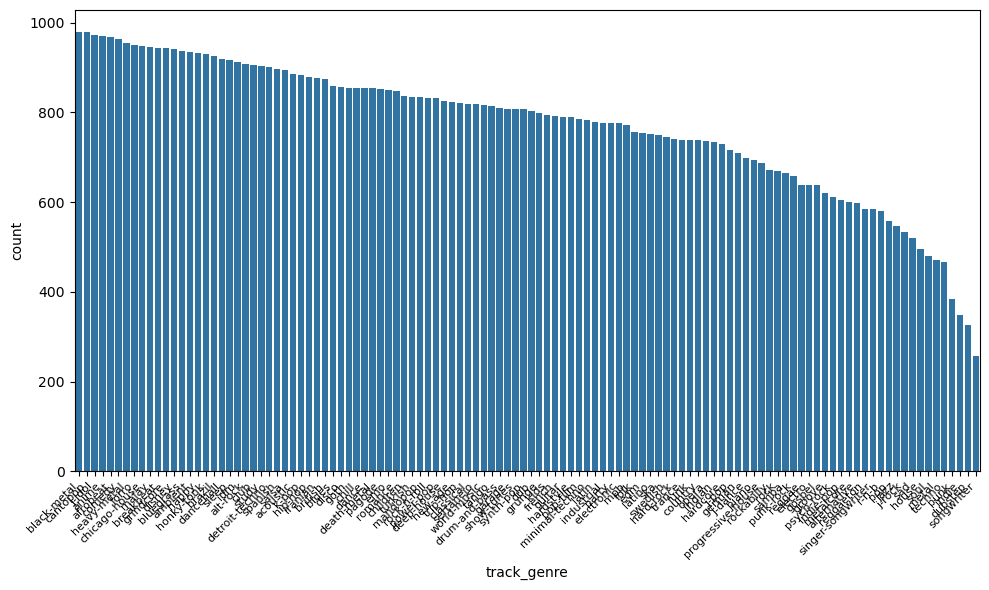

In [ ]:
#Lets visualise all 'track_genre' types:

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(
    x='track_genre',
    data=final_df,
    ax=ax,
    order=final_df['track_genre'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()




From the graph above we can draw two  main conclusions:

a. Some music genres have more track_id entries than others, making the data unbalanced.

b. There are too many music genres for the human eye to easily interpret patterns.
Additionally, some genres overlap in their characteristics with broader genres.
For example, 'rock', 'rock-n-roll', and 'alt-rock' are different subgenres that fall under the broader category of rock.
Hence, we decided to group them.
This grouping aims to reduce genre overlap and improve classification accuracy.


### 2.2.1 Grouping track_genre into 10 broader music categories

In [ ]:
# Therefore, in the following steps, we decided to group track_genre into 10 broader categories.

# Define genres for each group
electronic_genres=['electronic', 'idm', 'hardstyle', 'detroit-techno', 'chill', 'club', 'trance', 'deep-house', 'minimal-techno', 'dubstep', 'techno', 'progressive-house', 'house',
    'garage', 'disco', 'dance', 'chicago-house', 'edm', 'dancehall', 'drum-and-bass', 'breakbeat', 'trip-hop','j-dance', 'ambient', 'electro']

pop_genres=['pop', 'power-pop', 'synth-pop', 'indie-pop', 'singer-songwriter', 'j-pop', 'k-pop', 'cantopop', 'pop-film','j-idol']

rock_genres = ['rock', 'rock-n-roll', 'alt-rock', 'alternative', 'hard-rock', 'metal', 'heavy-metal', 'black-metal', 'death-metal', 'metalcore',
      'grunge', 'emo', 'psych-rock', 'hardcore', 'goth', 'industrial', 'punk', 'punk-rock', 'grindcore', 'j-rock','indie']

hiphop_genres = ['hip-hop', 'r-n-b', 'rap', 'soul']

world_genres = ['latin', 'latino', 'reggae', 'salsa', 'samba', 'brazil', 'forro', 'afrobeat', 'pagode', 'tango', 'french', 'german', 'british', 'iranian', 'indian', 'turkish', 'world-music', 'mandopop', 'mpb', 'malay', 'spanish','swedish']

Classical_Instrumental=['classical', 'piano', 'guitar']

jazz_blues_genres = ['jazz', 'blues', 'funk', 'groove', 'soul','acoustic', 'gospel']

Country_Folk=['country', 'folk', 'honky-tonk', 'bluegrass','rockabilly', 'sertanejo']

Specialty_Other= ['anime', 'show-tunes', 'opera', 'comedy', 'disney', 'new-age', 'children', 'study', 'happy', 'sleep', 'kids', 'romance', 'sad', 'songwriter', 'party']

Reggae_Afrobeat=['reggae', 'dub', 'afrobeat', 'ska','reggaeton']



In [ ]:

# Create an empty mapping dictionary
genre_to_group = {}

# Assign genres to their corresponding groups
genre_to_group.update({genre: 'Electronic' for genre in electronic_genres})
genre_to_group.update({genre: 'Pop' for genre in pop_genres})
genre_to_group.update({genre: 'Rock' for genre in rock_genres})
genre_to_group.update({genre: 'Hip-Hop' for genre in hiphop_genres})
genre_to_group.update({genre: 'World' for genre in world_genres})
genre_to_group.update({genre: 'Classical/Instrumental' for genre in Classical_Instrumental})


genre_to_group.update({genre: 'Jazz/Blues' for genre in jazz_blues_genres})
genre_to_group.update({genre: 'Folk/Country' for genre in Country_Folk})
genre_to_group.update({genre: 'Specialty' for genre in Specialty_Other})

genre_to_group.update({genre: 'Reggae/Afrobeat' for genre in Reggae_Afrobeat})

# Now, use this final mapping dictionary to map genres in your dataframe
final_df['genre_group'] = final_df['track_genre'].map(genre_to_group)
final_df['genre_group'].unique()

array(['World', 'Folk/Country', 'Specialty', 'Pop',
       'Classical/Instrumental', 'Reggae/Afrobeat', 'Jazz/Blues',
       'Electronic', 'Rock', 'Hip-Hop'], dtype=object)

In [ ]:
final_df['genre_group'].nunique()

10

In [ ]:
final_df['genre_group'].isna().sum()

0

In [ ]:
final_df['genre_group'].isnull().sum()

0

In [ ]:
print(final_df.index.duplicated().sum())


10963


In [ ]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset2.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87862 entries, 0 to 109986
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          87862 non-null  object 
 1   duration_ms       87862 non-null  float64
 2   explicit          87862 non-null  float64
 3   danceability      87862 non-null  float64
 4   energy            87862 non-null  float64
 5   loudness          87862 non-null  float64
 6   speechiness       87862 non-null  float64
 7   acousticness      87862 non-null  float64
 8   instrumentalness  87862 non-null  float64
 9   tempo             87862 non-null  float64
 10  track_genre       87862 non-null  object 
 11  genre_group       87862 non-null  object 
dtypes: float64(9), object(3)
memory usage: 10.7+ MB


In [ ]:
# Identify and display rows with duplicate index labels in the dataframe

# Find duplicated index values
duplicate_indices = final_df.index[final_df.index.duplicated()]
# Select rows that have duplicated index labels
duplicates_df = final_df.loc[duplicate_indices]
duplicates_df



,track_id,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,track_genre,genre_group
3,73lXf5if6MWVWnsgXhK8bd,86675.0,0.0,0.664,0.6110,-8.687,0.0886,0.120000,0.000000,118.443,kids,Specialty
3,6lfxq3CG4xtTiEg7opyCyx,201933.0,0.0,0.266,0.0596,-18.515,0.0363,0.905000,0.000071,181.740,acoustic,Jazz/Blues
4,0jmz4aHEIBCRgrcV2xEkwB,289133.0,0.0,0.111,0.0568,-28.053,0.0551,0.990000,0.697000,169.401,sleep,Specialty
4,5vjLSffimiIP26QG5WcN2K,198853.0,0.0,0.618,0.4430,-9.681,0.0526,0.469000,0.000000,119.949,acoustic,Jazz/Blues
5,5Zx0Rrkn5RFBMD2PRxX3mI,180706.0,0.0,0.565,0.9770,-3.592,0.0546,0.028200,0.001320,106.478,power-pop,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...
70987,6oilrypHWm0iylwgX6ujQc,256626.0,0.0,0.519,0.2320,-9.029,0.0269,0.877000,0.000000,80.449,mandopop,World
72706,3GR2MyhdGvHnpSNJffuacz,281000.0,0.0,0.472,0.6270,-6.597,0.0579,0.181000,0.000000,169.873,mandopop,World
72706,6Av4y1NzrI41HkoqxQgMk3,193826.0,0.0,0.561,0.9740,-4.259,0.1060,0.000795,0.000016,115.015,metalcore,Rock
72954,26k6DzNcjwyS2SmSFhmqX7,254533.0,0.0,0.409,0.8320,-4.717,0.0422,0.000078,0.002660,164.032,j-idol,Pop


In [ ]:
#Need to reset the index because we have duplicates in the index but not in the values:
final_df = final_df.reset_index(drop=True)



In [ ]:
duplicate_indices = final_df.index[final_df.index.duplicated()]
duplicate_indices

Index([], dtype='int64')

In [ ]:
final_df['genre_group'].unique()

array(['World', 'Folk/Country', 'Specialty', 'Pop',
       'Classical/Instrumental', 'Reggae/Afrobeat', 'Jazz/Blues',
       'Electronic', 'Rock', 'Hip-Hop'], dtype=object)

In [ ]:
# generate 'genre_class' to map genre_group  to  int64 type becuase it is object:

# Define the genres and corresponding class labels
genres_to_map = {
    'Electronic': 0,
    'Pop': 1,
    'Rock': 2,
    'Hip-Hop': 3,
    'World': 4,
    'Classical/Instrumental': 5,
    'Jazz/Blues': 6,
    'Folk/Country': 7,
    'Specialty': 8,  # Keep only one 'Specialty'
    'Reggae/Afrobeat': 9  # Assign a unique label to Reggae/Afrobeat
}

# Map the genre_group to genre_class using the corrected mapping
final_df['genre_class'] = final_df['genre_group'].map(genres_to_map)


final_df['genre_class'].unique()



array([4, 7, 8, 1, 5, 9, 6, 0, 2, 3], dtype=int64)

In [ ]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset2.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87862 entries, 0 to 87861
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          87862 non-null  object 
 1   duration_ms       87862 non-null  float64
 2   explicit          87862 non-null  float64
 3   danceability      87862 non-null  float64
 4   energy            87862 non-null  float64
 5   loudness          87862 non-null  float64
 6   speechiness       87862 non-null  float64
 7   acousticness      87862 non-null  float64
 8   instrumentalness  87862 non-null  float64
 9   tempo             87862 non-null  float64
 10  track_genre       87862 non-null  object 
 11  genre_group       87862 non-null  object 
 12  genre_class       87862 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 8.7+ MB


## 2.3. **EDA and Visualization After Cleaning**

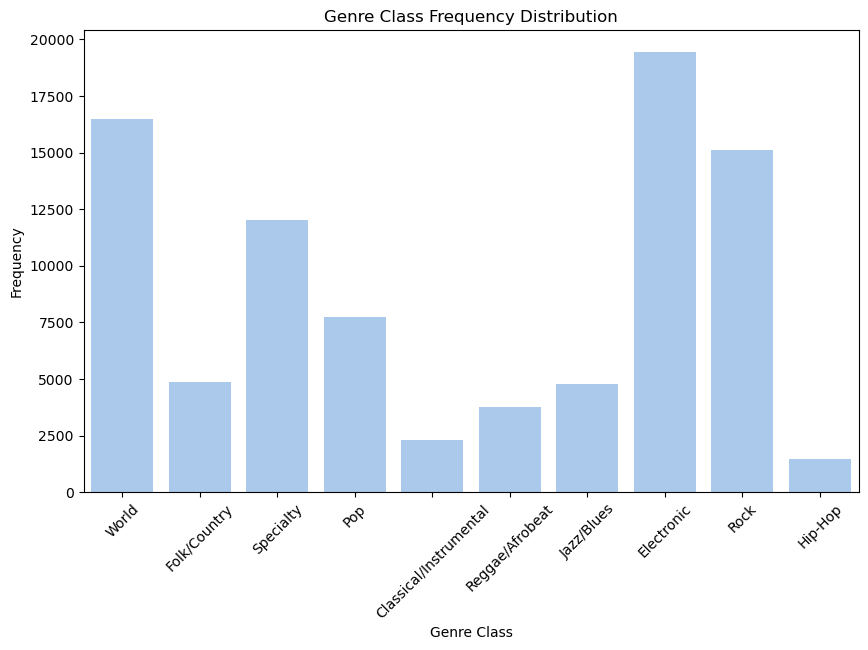

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set pastel palette
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='genre_group', data=final_df, color=sns.color_palette("pastel")[0])


plt.xlabel('Genre Class')
plt.ylabel('Frequency')
plt.title('Genre Class Frequency Distribution')

plt.xticks(rotation=45)
# Show the plot
plt.show()

#We can see that the groups are imbalanced. We will address this imbalance in the modeling process.



### 2.3.1 Descriptive statistics of the Features:

In [ ]:
#Descriptive statistics of the Features:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,73559.0,34.382088,19.192774,0.000,21.0000,34.000000,48.0000,100.000
duration_ms,73559.0,232129.344553,119005.588634,8586.000,173933.0000,215880.000000,268600.0000,5237295.000
explicit,73559.0,0.086380,0.280926,0.000,0.0000,0.000000,0.0000,1.000
danceability,73559.0,0.558642,0.178518,0.000,0.4450,0.573000,0.6900,0.985
energy,73559.0,0.636956,0.258683,0.000,0.4570,0.680000,0.8590,1.000
key,73559.0,5.283704,3.556507,0.000,2.0000,5.000000,8.0000,11.000
loudness,73559.0,-8.603882,5.319223,-49.531,-10.4675,-7.266000,-5.1410,4.532
mode,73559.0,0.633763,0.481778,0.000,0.0000,1.000000,1.0000,1.000
speechiness,73559.0,0.090329,0.119277,0.000,0.0362,0.049400,0.0884,0.965
acousticness,73559.0,0.331198,0.339829,0.000,0.0160,0.194000,0.6320,0.996


In [ ]:
#Summery table for all vars

pd.set_option('display.precision', 2) #show only 2 digit after zero
final_df.describe()

,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,genre_class
count,8.79e+04,87862.00,87862.00,87862.00,87862.00,87862.00,87862.00,8.79e+04,87862.00,87862.00
mean,2.29e+05,0.09,0.57,0.64,-8.31,0.09,0.32,1.63e-01,122.14,3.55
std,1.12e+05,0.28,0.18,0.25,5.11,0.11,0.33,3.16e-01,30.14,2.97
min,8.59e+03,0.00,0.00,0.00,-49.53,0.00,0.00,0.00e+00,0.00,0.00
25%,1.74e+05,0.00,0.45,0.47,-10.07,0.04,0.02,0.00e+00,99.05,1.00
50%,2.14e+05,0.00,0.58,0.69,-7.03,0.05,0.17,4.49e-05,122.02,4.00
75%,2.64e+05,0.00,0.70,0.86,-5.02,0.09,0.60,6.21e-02,140.10,6.00
max,5.24e+06,1.00,0.98,1.00,4.53,0.96,1.00,1.00e+00,243.37,9.00


In [ ]:
final_df['genre_class'].unique()

array([4, 7, 8, 1, 5, 9, 6, 0, 2, 3], dtype=int64)

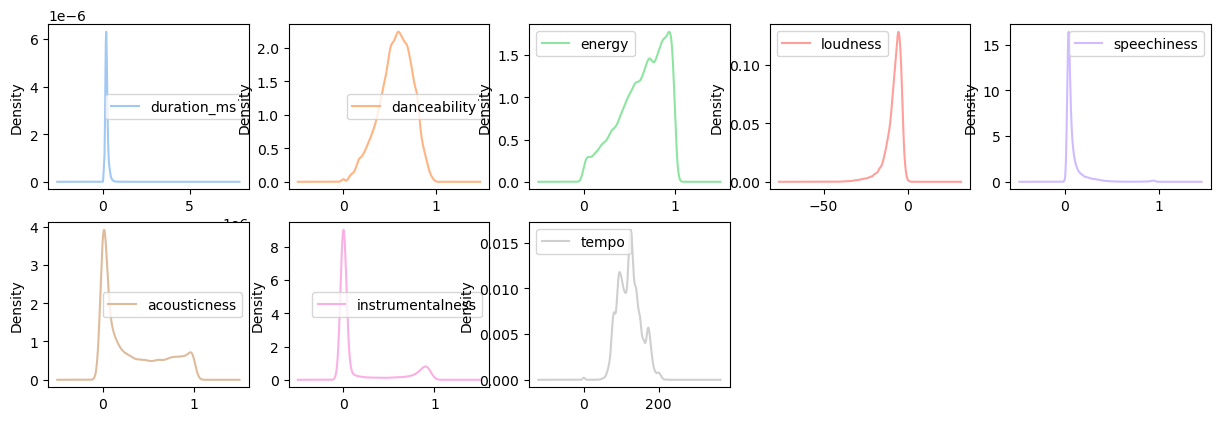

In [ ]:
# Visualising the density plots  only for quantitiative  features:
final_df.drop(columns=['explicit','genre_class']).plot(kind="density", layout=(6, 5),
                                         subplots=True, sharex=False, sharey=False, figsize=(15, 15))
plt.show()



In [ ]:
# Here we investigate the skeewness
quantitative_df = final_df.select_dtypes(include='number').drop(columns=['explicit', 'genre_class'])

# Calculate skewness for each quantitative feature
skewness_values = quantitative_df.skew()

# Display skewness values
print(skewness_values)


#A skewness close to 0 suggests a symmetrical distribution.
#A positive skewness indicates a right-skewed distribution (tail on the right).
#A negative skewness indicates a left-skewed distribution (tail on the left).


duration_ms         11.43
danceability        -0.41
energy              -0.61
loudness            -2.02
speechiness          4.54
acousticness         0.71
instrumentalness     1.66
tempo                0.21
dtype: float64


Next we investigated The features distributions'.
Based on the descriptive statistic table, the figures above, and the skweness calculation:
We found a right-skewed distribution for the folowing variables:
duration_ms, speechiness, acousticness
and instrumentalnes, and a left-skewed distribution for loudness(for example, 75% (q3) of the cases are below -0.5, whereas the max value of loudness is 4.5).

We will deal with feature engeneering for the skwenss later on.


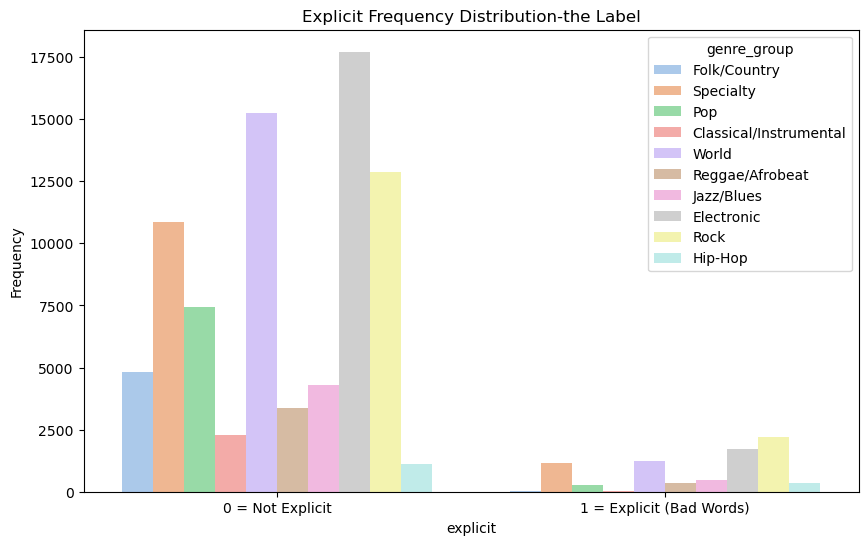

In [ ]:
# Graph for explicit_cat by track_genre
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='explicit', hue='genre_group', data=final_df, palette="pastel")


plt.xlabel('explicit')
plt.ylabel('Frequency')
plt.title('Explicit Frequency Distribution-the Label')

plt.xticks([0, 1], ['0 = Not Explicit', '1 = Explicit (Bad Words)'])

plt.show()

# Bar Chart for the Categorical Feature: 'Explicit' (Presence of Explicit Language).
#As expected, Hip Hop and Death Metal show the highest frequencies of explicit content, while Classical music has none.


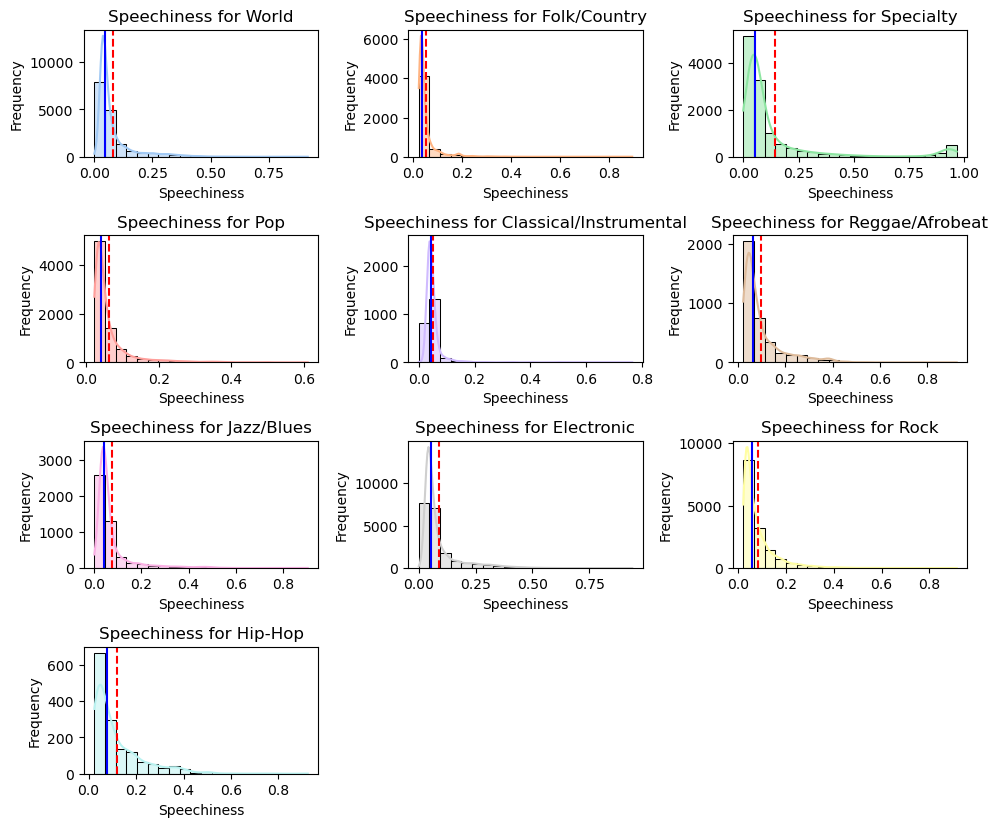

In [ ]:
#what is the distribution of speechiness by track_genre?
#what is the mean and median values? WE RUN THESE FOR ALL VARIABLE-BUT IT IS NOT SHOWN IN THIS NOTEBOOK


# Get unique genres
genres = final_df['genre_group'].unique()

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(5, 3, figsize=(10, 10))  # 2 rows, 3 columns

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each genre and plot the distribution of speechiness for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for speechiness
    sns.histplot(df_genre['speechiness'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_speechiness = df_genre['speechiness'].mean()
    median_speechiness = df_genre['speechiness'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_speechiness, color='red', linestyle='--', label=f'Mean: {mean_speechiness:.2f}')
    axes[i].axvline(median_speechiness, color='blue', linestyle='-', label=f'Median: {median_speechiness:.2f}')

    # Set labels and title
    axes[i].set_xlabel('Speechiness')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Speechiness for {genre}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

## 2.4  **Feature engineering and Scaling**

In [ ]:

#We first use log trnasformation for featuears that are heavily right-skewed, with most values near zero and a long right tail:
#  (duration_ms, speechiness, acousticness, instrumentalness).


final_df['duration_ms_log'] = np.log1p(final_df['duration_ms'])
final_df['speechiness_log'] = np.log1p(final_df['speechiness'])
final_df['acousticness_log'] = np.log1p(final_df['acousticness'])
final_df['instrumentalness_log'] = np.log1p(final_df['instrumentalness'])


print(final_df[['duration_ms', 'duration_ms_log']])


       duration_ms  duration_ms_log
0         178533.0            12.09
1         151680.0            11.93
2          84305.0            11.34
3          86675.0            11.37
4         289133.0            12.57
...            ...              ...
87857     207554.0            12.24
87858     191153.0            12.16
87859     207554.0            12.24
87860     256226.0            12.45
87861     212346.0            12.27

[87862 rows x 2 columns]


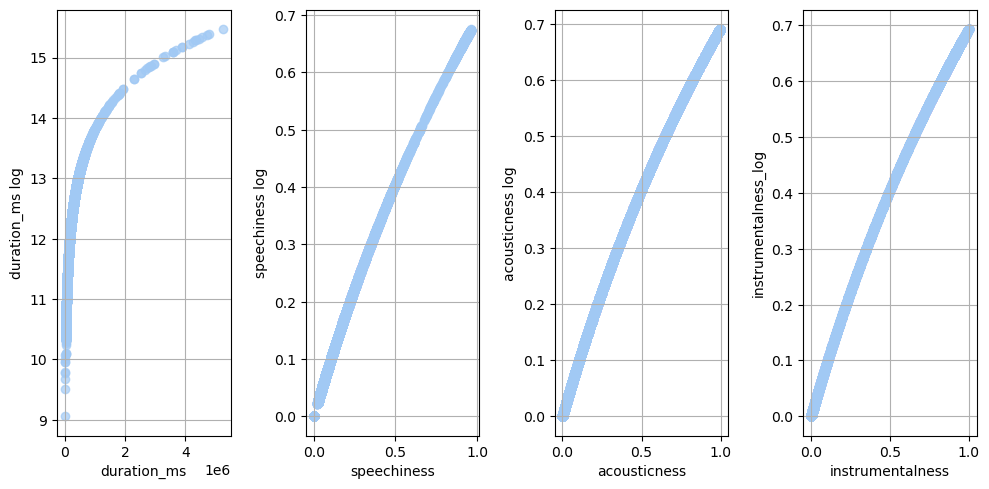

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting 'tempo' vs 'tempo^2' in the first subplot
plt.subplot(1, 4, 1)
plt.scatter(final_df['duration_ms'], final_df['duration_ms_log'], alpha=0.7)
plt.xlabel('duration_ms')
plt.ylabel('duration_ms log')
plt.grid(True)

# Plotting 'danceability' vs 'danceability^2' in the second subplot
plt.subplot(1, 4, 2)
plt.scatter(final_df['speechiness'], final_df['speechiness_log'], alpha=0.7)
plt.xlabel('speechiness')
plt.ylabel('speechiness log')
plt.grid(True)


plt.subplot(1, 4, 3)
plt.scatter(final_df['acousticness'], final_df['acousticness_log'], alpha=0.7)
plt.xlabel('acousticness')
plt.ylabel('acousticness log')
plt.grid(True)


plt.subplot(1, 4, 4)
plt.scatter(final_df['instrumentalness'], final_df['instrumentalness_log'], alpha=0.7)
plt.xlabel('instrumentalness')
plt.ylabel('instrumentalness_log')
plt.grid(True)



# Show the combined plot
plt.tight_layout()
plt.show()

In [ ]:
#Generating polynomial feature for tempo and denceability becuase they are not linear:
from sklearn.preprocessing import PolynomialFeatures


# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'tempo' feature
poly_features = poly.fit_transform(final_df[['tempo']])

# Get the feature names for the new polynomial features
poly_feature_names = poly.get_feature_names_out(['tempo'])

# Add the polynomial features directly to the original DataFrame
final_df[poly_feature_names] = poly_features



poly2 = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'danceability' feature
poly_features2 = poly2.fit_transform(final_df[['danceability']])

# Get the feature names for the new polynomial features
poly_feature_names2 = poly2.get_feature_names_out(['danceability'])

# Add the polynomial features directly to the original DataFrame
final_df[poly_feature_names2] = poly_features2


print(final_df.head())




                 track_id  duration_ms  explicit  danceability  energy  \
0  0fROT4kK5oTm8xO8PX6EJF     178533.0       1.0          0.82    0.61   
1  1hH0t381PIXmUVWyG1Vj3p     151680.0       0.0          0.61    0.38   
2  1B45DvGMoFWdbAEUH2qliG      84305.0       0.0          0.55    0.81   
3  73lXf5if6MWVWnsgXhK8bd      86675.0       0.0          0.66    0.61   
4  0jmz4aHEIBCRgrcV2xEkwB     289133.0       0.0          0.11    0.06   

   loudness  speechiness  acousticness  instrumentalness   tempo track_genre  \
0     -7.77         0.25          0.17          0.00e+00  142.96      french   
1    -10.36         0.03          0.48          0.00e+00  110.72  rockabilly   
2     -5.54         0.06          0.13          9.92e-06  118.37        kids   
3     -8.69         0.09          0.12          0.00e+00  118.44        kids   
4    -28.05         0.06          0.99          6.97e-01  169.40       sleep   

    genre_group  genre_class  duration_ms_log  speechiness_log  \
0       

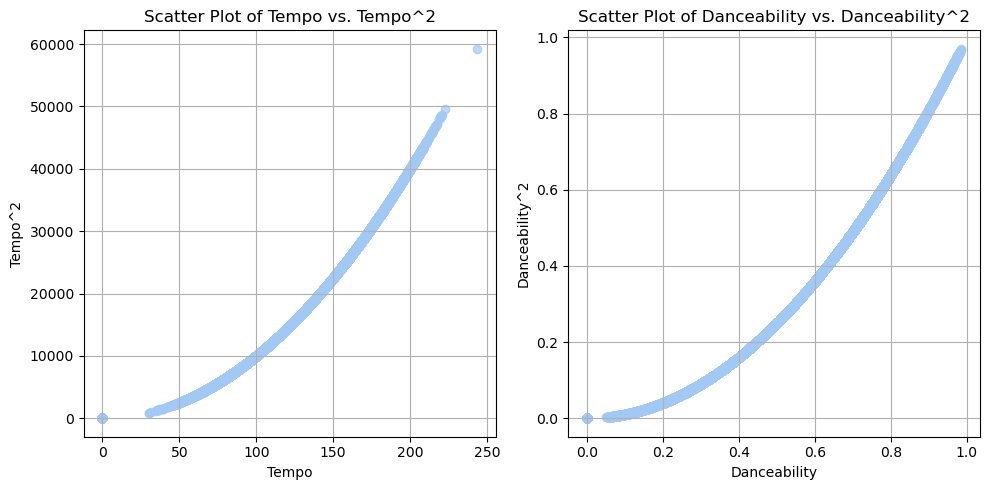

In [ ]:
# Combined plot of both polynomial transformations in a single figure

plt.figure(figsize=(10, 5))

# Plotting 'tempo' vs 'tempo^2' in the first subplot
plt.subplot(1, 2, 1)
plt.scatter(final_df['tempo'], final_df['tempo^2'], alpha=0.7)
plt.title('Scatter Plot of Tempo vs. Tempo^2')
plt.xlabel('Tempo')
plt.ylabel('Tempo^2')
plt.grid(True)

# Plotting 'danceability' vs 'danceability^2' in the second subplot
plt.subplot(1, 2, 2)
plt.scatter(final_df['danceability'], final_df['danceability^2'], alpha=0.7)
plt.title('Scatter Plot of Danceability vs. Danceability^2')
plt.xlabel('Danceability')
plt.ylabel('Danceability^2')
plt.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()


In [ ]:
# Creating interaction variables directly in final_df
# Interaction between 'duration_ms' and 'energy'
final_df['duration_ms_energy_interaction'] = final_df['duration_ms'] * final_df['energy']

# Interaction between 'tempo' and 'danceability'
final_df['tempo_danceability_interaction'] = final_df['tempo'] * final_df['danceability']

# Display the first few rows to verify the new interaction columns
print(final_df[['duration_ms', 'energy', 'duration_ms_energy_interaction', 'tempo', 'danceability', 'tempo_danceability_interaction']].head())


   duration_ms  energy  duration_ms_energy_interaction   tempo  danceability  \
0     178533.0    0.61                       109262.20  142.96          0.82   
1     151680.0    0.38                        56880.00  110.72          0.61   
2      84305.0    0.81                        68455.66  118.37          0.55   
3      86675.0    0.61                        52958.42  118.44          0.66   
4     289133.0    0.06                        16422.75  169.40          0.11   

   tempo_danceability_interaction  
0                          117.66  
1                           68.09  
2                           65.46  
3                           78.65  
4                           18.80  


Feature Engeneering

# .3. **Correlation Analysis**

In [ ]:
#What is the correlation between all quantitative features in the dataset? Using Pearson correlation coefficients.
#we use Pearson correlation coefficients:
columns = ['speechiness','danceability', 'loudness', 'tempo','acousticness','energy','instrumentalness','duration_ms']

correlation_matrix = final_df[columns].corr()

print(correlation_matrix)

#Danceability and loudness have a relatively strong correlation, while loudness and speechiness show a medium correlation.
#Surprisingly, tempo and danceability have a very low correlation, which can be explained by the fact that classical tracks tend to have a high tempo and low danceability.


                  speechiness  danceability  loudness     tempo  acousticness  \
speechiness          1.00e+00          0.11  5.28e-02  3.15e-03          0.01   
danceability         1.07e-01          1.00  2.73e-01 -4.15e-02         -0.17   
loudness             5.28e-02          0.27  1.00e+00  2.19e-01         -0.58   
tempo                3.15e-03         -0.04  2.19e-01  1.00e+00         -0.21   
acousticness         1.50e-02         -0.17 -5.77e-01 -2.12e-01          1.00   
energy               1.37e-01          0.14  7.55e-01  2.49e-01         -0.72   
instrumentalness    -9.72e-02         -0.20 -4.36e-01 -5.17e-02          0.09   
duration_ms         -6.13e-02         -0.07 -1.76e-03  2.59e-02         -0.10   

                  energy  instrumentalness  duration_ms  
speechiness         0.14             -0.10    -6.13e-02  
danceability        0.14             -0.20    -6.66e-02  
loudness            0.75             -0.44    -1.76e-03  
tempo               0.25             -

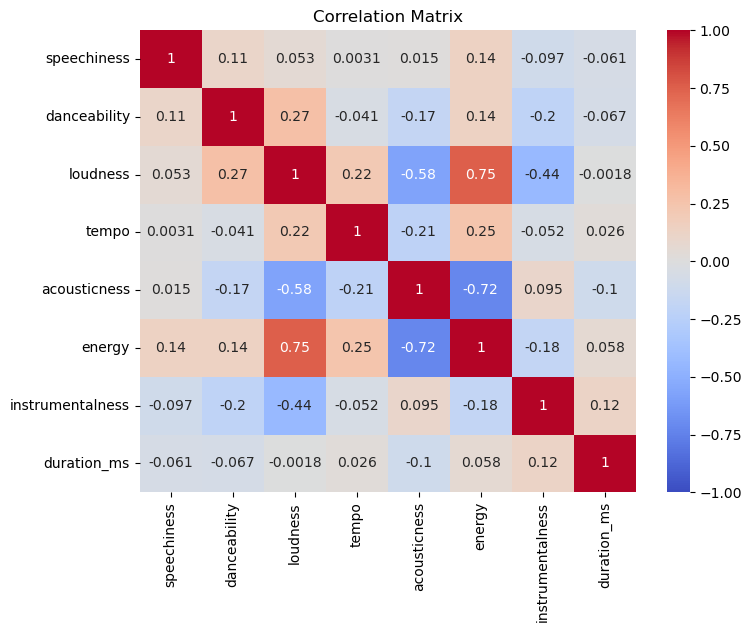

In [ ]:
# Correlation plot: we did this beacuse we want to check the relationship between the features in the model and to prevent multicollinearity.
#We want to make sure that the features are not measuring the same attribute.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#High correlations between: enrgy and loudness
                        #enrgy and acousticness
# so i can drop energy from the model
# OR i CAN APPLY PCA DIMENSIONALITY REDUCTION


In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif  # Use f_classif as the scoring function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

#Building the piplines:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


## 3.1 Model Comparison (Random Forest, SVM, Desicion Tree, Logistic Regression) NOTEBOOK A
      - Impact of feature engeneering and class balancing (SMOTE/ using balanced portion of the data/ Clustering + SMOTE) on the models - NOTEBOOK A

**Ctrl+click the link bellow, this will direct you to notebook A** for comparison between different models in different given parameters (classes and features).

In [ ]:
from IPython.display import HTML

link = '<a href="https://colab.research.google.com/drive/16sKKPEt2-Q2RtBCwblU8_XSlFQvBXSXt" target="_blank">Open Notebook</a>'
display(HTML(link))


In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif  # Use f_classif as the scoring function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

#Building the piplines:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# .4. **Model Building**



## 4.1 **Logistic regession with original features**

In [ ]:

#STARTING WITH LOGISTIC REGRESSION

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler()),  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')



# Voting Classifier Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',clf1)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0],  # Regularization parameter for Logistic Regression
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)


In [ ]:
# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")




Test Accuracy: 0.28


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test,  # True labels
                      y_pred=y_pred_test)  # Predicted labels

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels from the voting classifier
                     columns=best_model.named_steps['classifier'].classes_)

cm_df



,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
Classical/Instrumental,414,7,96,15,48,34,12,34,14,17
Electronic,343,1886,266,640,187,254,1229,828,169,30
Folk/Country,87,25,679,56,160,153,94,130,26,45
Hip-Hop,0,8,49,171,37,21,93,23,14,22
Jazz/Blues,60,50,319,191,284,129,141,190,33,33
Pop,55,91,461,161,315,312,363,463,31,64
Reggae/Afrobeat,17,124,58,269,25,79,324,194,21,11
Rock,46,226,375,291,216,301,324,2646,56,47
Specialty,815,293,454,361,288,96,350,361,561,28
World,321,141,1164,756,528,469,607,544,200,210


In [ ]:

from sklearn.metrics import confusion_matrix

# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels from the classifier
                     columns=best_model.named_steps['classifier'].classes_)

# Calculate the accuracy for each class
class_accuracies = {}
for i, class_label in enumerate(best_model.named_steps['classifier'].classes_):
    # Calculate the accuracy for the current class
    class_accuracy = cm[i, i] / cm[i, :].sum()
    class_accuracies[class_label] = class_accuracy

# Convert to a DataFrame for a nicer presentation and sort it in descending order
class_accuracies_df = pd.DataFrame(list(class_accuracies.items()), columns=['Genre Group', 'Accuracy'])
class_accuracies_df = class_accuracies_df.sort_values(by='Accuracy', ascending=False)

# Print the result
print("Accuracy for Each Genre Group (Descending Order):")
print(class_accuracies_df)


Accuracy for Each Genre Group (Descending Order):
              Genre Group  Accuracy
0  Classical/Instrumental      0.60
7                    Rock      0.58
2            Folk/Country      0.47
3                 Hip-Hop      0.39
1              Electronic      0.32
6         Reggae/Afrobeat      0.29
4              Jazz/Blues      0.20
8               Specialty      0.16
5                     Pop      0.13
9                   World      0.04


In [ ]:
# Check class distribution in the target variable
print(y_train.value_counts(normalize=True))


genre_group
Electronic                0.22
World                     0.19
Rock                      0.17
Specialty                 0.14
Pop                       0.09
Folk/Country              0.06
Jazz/Blues                0.05
Reggae/Afrobeat           0.04
Classical/Instrumental    0.03
Hip-Hop                   0.02
Name: proportion, dtype: float64


### **4.1.1 Logistic regression with feature engineering (log-transformed, polynomial, and interaction features to improve accuracy results)**

In [ ]:

#Adding the new variables we created: log-transformed, polynomial, and interaction features:

# Assuming log-transformed, polynomial, and interaction features were already created in final_df

# List of original quantitative features
quantitative_columns = ['duration_ms','energy', 'loudness','duration_ms_log',	'speechiness_log',	'acousticness_log',	'instrumentalness_log'	,
                        'tempo^2'	,'danceability^2'	,'duration_ms_energy_interaction',	'tempo_danceability_interaction']


# Define the non-quantitative columns
non_quantitative = ['explicit']

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the preprocessing pipeline for all quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler()),  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitative)
])

# Define the Logistic Regression classifier
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf1)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0],  # Regularization parameter for Logistic Regression
}

# Perform GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)



In [ ]:
### Evaluate the model for the test and train set###

# 1. Predict on the training set
y_pred_train = best_model.predict(X_train)

# 2. Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

###Evaluate the model for the test set###

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate the confusion matrix for the test set
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels
                     columns=best_model.named_steps['classifier'].classes_)

# Display the confusion matrix DataFrame
cm_df

#With the transformed variables the model imporve with only 0.2 precentage points.


from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true=y_test, y_pred=y_pred_test, target_names=best_model.named_steps['classifier'].classes_)

# Print the classification report
print(f"classification report for the test set")
print(report)


# We store model metrics results for future comaprison:
model_metrics = {}

# Generate the classification report as a dictionary
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_dict = classification_report(y_true=y_test, y_pred=y_pred_test, output_dict=True)




# Store results for: Precision, Recall, and F1-score for each class and the overall average
model_name = "Logistic Regression"  # Change this for future models

# Store metrics in the dictionary
model_metrics[model_name] = {
    'precision': report_dict['weighted avg']['precision'],
    'recall': report_dict['weighted avg']['recall'],
    'f1-score': report_dict['weighted avg']['f1-score']
}

# Display the stored metrics
print(f"Metrics for {model_name}:")
print(model_metrics[model_name])



Train Accuracy: 0.29
Test Accuracy: 0.30
classification report for the test set
                        precision    recall  f1-score   support

Classical/Instrumental       0.19      0.61      0.29       691
            Electronic       0.67      0.33      0.44      5832
          Folk/Country       0.18      0.48      0.26      1455
               Hip-Hop       0.06      0.37      0.10       438
            Jazz/Blues       0.15      0.21      0.17      1430
                   Pop       0.17      0.16      0.17      2316
       Reggae/Afrobeat       0.10      0.28      0.15      1122
                  Rock       0.49      0.60      0.54      4528
             Specialty       0.51      0.17      0.25      3607
                 World       0.44      0.07      0.11      4940

              accuracy                           0.30     26359
             macro avg       0.30      0.33      0.25     26359
          weighted avg       0.43      0.30      0.30     26359

Metrics for Logistic 

## **4.2 Voting classifier with original features**

In [ ]:

#Ensemble trees: First applying The Voting Classifier for the original features


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5, random_state=422,class_weight='balanced')


voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2)
], voting='soft')  # Use 'soft' to allow probability predictions


# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__lr__C': [0.01, 0.1],  # Logistic Regression
    'voting_clf__dt1__max_depth': [10],  # Decision Tree 1
    'voting_clf__dt1__min_samples_split': [4],
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)

# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)



In [ ]:
### Evaluate the model for the test and train set###
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize a dictionary to store model metrics
model_metrics = {}


y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate the classification report for the training set as a dictionary (without printing it)
train_report_dict = classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)

# 2. Evaluate the model on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the classification report for the test set
test_report_dict = classification_report(y_true=y_test, y_pred=y_pred_test, output_dict=True)
print("Test Set Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_test, target_names=best_model.named_steps['voting_clf'].classes_))

# 3. Store results for: Precision, Recall, and F1-score for each class and the overall average
model_name = "Voting Classifier"

# Store train metrics (without printing the report)
model_metrics[f"{model_name}_train"] = {
    'precision': train_report_dict['weighted avg']['precision'],
    'recall': train_report_dict['weighted avg']['recall'],
    'f1-score': train_report_dict['weighted avg']['f1-score']
}

# Store test metrics
model_metrics[f"{model_name}_test"] = {
    'precision': test_report_dict['weighted avg']['precision'],
    'recall': test_report_dict['weighted avg']['recall'],
    'f1-score': test_report_dict['weighted avg']['f1-score']
}

# Display the stored metrics

print(f"Metrics for {model_name} (Test): {model_metrics[f'{model_name}_test']}")



Train Accuracy: 0.36
Test Accuracy: 0.34
Test Set Classification Report:
                        precision    recall  f1-score   support

Classical/Instrumental       0.23      0.56      0.33       704
            Electronic       0.66      0.37      0.48      5703
          Folk/Country       0.20      0.50      0.29      1459
               Hip-Hop       0.07      0.45      0.12       399
            Jazz/Blues       0.20      0.19      0.19      1475
                   Pop       0.22      0.24      0.23      2320
       Reggae/Afrobeat       0.14      0.36      0.20      1132
                  Rock       0.52      0.60      0.56      4561
             Specialty       0.60      0.29      0.39      3706
                 World       0.47      0.11      0.18      4900

              accuracy                           0.34     26359
             macro avg       0.33      0.37      0.30     26359
          weighted avg       0.46      0.34      0.36     26359

Metrics for Voting Classifie

In [ ]:
# Using the ROC curve and AUC to see how the model preforms at different classification thresholds:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Voting Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Voting Classifier test ROC AUC: {roc_auc:.2f}")

Voting Classifier train ROC AUC: 0.81
Voting Classifier test ROC AUC: 0.78


### **4.2.1 Voting classifier with transformed features to increase accurecy levels:**

In [ ]:

# Ensemble trees: Applying The Voting Classifier after feature engeneering

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

quantitative_columns = ['duration_ms','energy', 'loudness','duration_ms_log',	'speechiness_log',	'acousticness_log',	'instrumentalness_log'	,
                        'tempo^2'	,'danceability^2'	,'duration_ms_energy_interaction',	'tempo_danceability_interaction']


# Define the non-quantitative columns
non_quantitative = ['explicit']

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the preprocessing pipeline for all quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k=5)),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Pass through non-quantitative columns
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2)
], voting='soft')  # Use 'soft' to allow probability predictions

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__lr__C': [0.01, 0.1],  # Logistic Regression
    'voting_clf__dt1__max_depth': [5, 10, 15],  # Decision Tree max depth
    'voting_clf__dt1__min_samples_split': [2, 4, 6]  # Decision Tree min samples split
}



# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)

# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


In [ ]:
### Evaluate the model for the test and train set###


model_metrics = {}

# 1. Evaluate the model on the training set
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate the classification report for the training set as a dictionary (without printing it)
train_report_dict = classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)

# 2. Evaluate the model on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the classification report for the test set
test_report_dict = classification_report(y_true=y_test, y_pred=y_pred_test, output_dict=True)
print("Test Set Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_test, target_names=best_model.named_steps['voting_clf'].classes_))

# 3. Store results for: Precision, Recall, and F1-score for each class and the overall average
model_name = "Voting Classifier"

# Store train metrics (without printing the report)
model_metrics[f"{model_name}_train"] = {
    'precision': train_report_dict['weighted avg']['precision'],
    'recall': train_report_dict['weighted avg']['recall'],
    'f1-score': train_report_dict['weighted avg']['f1-score']
}

# Store test metrics
model_metrics[f"{model_name}_test"] = {
    'precision': test_report_dict['weighted avg']['precision'],
    'recall': test_report_dict['weighted avg']['recall'],
    'f1-score': test_report_dict['weighted avg']['f1-score']
}

# Display the stored metrics

print(f"Metrics for {model_name} (Test): {model_metrics[f'{model_name}_test']}")


Train Accuracy: 0.41
Test Accuracy: 0.33
Test Set Classification Report:
                        precision    recall  f1-score   support

Classical/Instrumental       0.24      0.50      0.32       691
            Electronic       0.66      0.36      0.47      5832
          Folk/Country       0.16      0.43      0.23      1455
               Hip-Hop       0.07      0.38      0.12       438
            Jazz/Blues       0.19      0.26      0.22      1430
                   Pop       0.17      0.19      0.18      2316
       Reggae/Afrobeat       0.14      0.36      0.20      1122
                  Rock       0.55      0.55      0.55      4528
             Specialty       0.53      0.28      0.37      3607
                 World       0.46      0.13      0.20      4940

              accuracy                           0.33     26359
             macro avg       0.32      0.35      0.29     26359
          weighted avg       0.45      0.33      0.35     26359

Metrics for Voting Classifie

## 4.3 **Random Forest Classifier with original features**

In [ ]:
# RandomForest with voting classifier and Logistic regression for the original features:
#OVER 35 MINUTES TO RUN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'tempo']

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Pass non-quantitative columns through without transformation
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers for VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=422, class_weight='balanced')

# Define VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('rf', clf3)
], voting='soft')

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for RandomForestClassifier within the VotingClassifier
param_grid = {
    'voting_clf__rf__n_estimators': [50, 100],
    'voting_clf__rf__max_depth': [5, 10, 15],
    'voting_clf__rf__min_samples_split': [2, 4],
    'voting_clf__rf__min_samples_leaf': [1, 2],
    'voting_clf__rf__criterion': ['gini', 'entropy'],
    'voting_clf__rf__bootstrap': [True, False]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train = best_model.predict(X_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)



In [ ]:
### Random Forest:Evaluate the model for the test and train set###


model_metrics = {}

# 1. Evaluate the model on the training set
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate the classification report for the training set as a dictionary (without printing it)
train_report_dict = classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)

# 2. Evaluate the model on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the classification report for the test set
test_report_dict = classification_report(y_true=y_test, y_pred=y_pred_test, output_dict=True)
print("Test Set Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_test, target_names=best_model.named_steps['voting_clf'].classes_))

# 3. Store results for: Precision, Recall, and F1-score for each class and the overall average
model_name = "Random Forest"


# Store train metrics (without printing the report)
model_metrics[f"{model_name}_train"] = {
    'precision': train_report_dict['weighted avg']['precision'],
    'recall': train_report_dict['weighted avg']['recall'],
    'f1-score': train_report_dict['weighted avg']['f1-score']
}

# Store test metrics
model_metrics[f"{model_name}_test"] = {
    'precision': test_report_dict['weighted avg']['precision'],
    'recall': test_report_dict['weighted avg']['recall'],
    'f1-score': test_report_dict['weighted avg']['f1-score']
}

# Display the stored metrics

print(f"Metrics for {model_name} (Test): {model_metrics[f'{model_name}_test']}")


Train Accuracy: 0.59
Test Accuracy: 0.42
Test Set Classification Report:
                        precision    recall  f1-score   support

Classical/Instrumental       0.29      0.54      0.38       704
            Electronic       0.66      0.48      0.56      5703
          Folk/Country       0.24      0.55      0.33      1459
               Hip-Hop       0.08      0.40      0.14       399
            Jazz/Blues       0.29      0.25      0.27      1475
                   Pop       0.28      0.33      0.30      2320
       Reggae/Afrobeat       0.20      0.39      0.26      1132
                  Rock       0.57      0.63      0.60      4561
             Specialty       0.62      0.40      0.49      3706
                 World       0.49      0.18      0.27      4900

              accuracy                           0.42     26359
             macro avg       0.37      0.42      0.36     26359
          weighted avg       0.49      0.42      0.43     26359

Metrics for Random Forest (T

## 4.3.1 **Model evaluation for Random Forest: Feature importance**


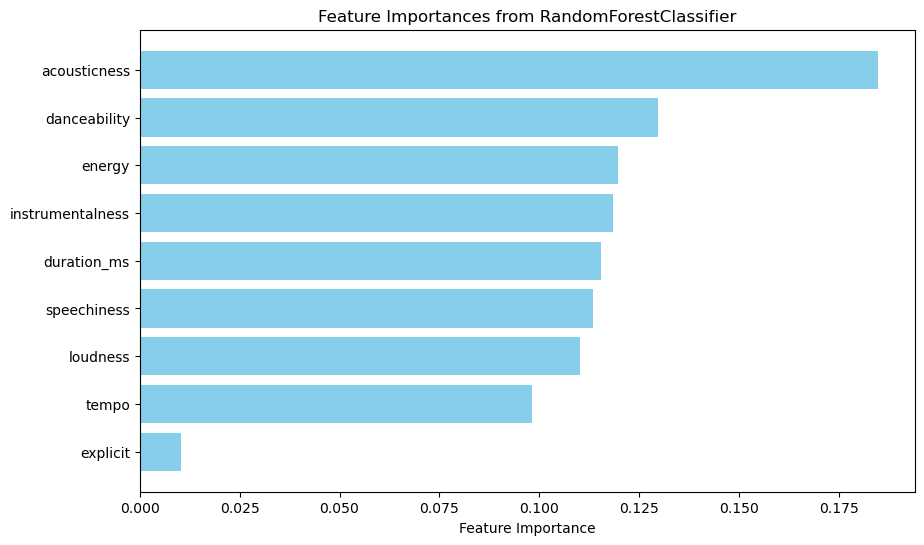

In [ ]:
# Feature Importances


# Extract feature importances from RandomForest in VotingClassifier
feature_importances = best_model.named_steps['voting_clf'].estimators_[2].feature_importances_

# Get the feature names after preprocessing
# Use get_feature_names_out() for extracting names after transformation
preprocessor = best_model.named_steps['preprocessor']
transformed_feature_names = preprocessor.get_feature_names_out()

# Convert to a list of feature names
feature_names = [name.split("__")[-1] for name in transformed_feature_names]

# Ensure the number of features matches the length of feature importances
if len(feature_names) != len(feature_importances):
    print(f"Warning: Mismatch between feature names ({len(feature_names)}) and importances ({len(feature_importances)}).")

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()




#When we tried to drop 'explicit' from the model, the accuracy score was abit lower.

### **4.3.2 ROC AUC for Random Forest**

In [ ]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Random Forest Classifier test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 0.95
Random Forest Classifier test ROC AUC: 0.83


### 4.3.3 Random Forest With transformed variables:

In [ ]:
#With TRANSFORMED VARIABLES:
# #Takes 5 min to run

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score


quantitative_columns = ['duration_ms', 'energy', 'loudness', 'duration_ms_log', 'speechiness_log',
                        'acousticness_log', 'instrumentalness_log', 'tempo^2', 'danceability^2',
                        'duration_ms_energy_interaction', 'tempo_danceability_interaction']
non_quantitative = ['explicit']


X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('selector', SelectKBest(score_func=f_classif, k=5)),
        ('scaler', StandardScaler())
    ]), quantitative_columns),
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5, random_state=422, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=422, class_weight='balanced')

# Define VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2),
    ('rf', clf3)
], voting='soft')

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define parameter grid for RandomForest inside VotingClassifier
param_grid = {
    'voting_clf__rf__n_estimators': [50, 100],
    'voting_clf__rf__max_depth': [5, 10, 15],
    'voting_clf__rf__min_samples_split': [2, 4],
    'voting_clf__rf__min_samples_leaf': [1, 2],
    'voting_clf__rf__criterion': ['gini'],
    'voting_clf__rf__bootstrap': [True, False]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the training and test sets
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)




In [ ]:
### Random Forest:Evaluate the model for the test and train set###


model_metrics = {}

# 1. Evaluate the model on the training set
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate the classification report for the training set as a dictionary (without printing it)
train_report_dict = classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)

# 2. Evaluate the model on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the classification report for the test set
test_report_dict = classification_report(y_true=y_test, y_pred=y_pred_test, output_dict=True)
print("Test Set Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_test, target_names=best_model.named_steps['voting_clf'].classes_))

# 3. Store results for: Precision, Recall, and F1-score for each class and the overall average
model_name = "XGboost"



# Store train metrics (without printing the report)
model_metrics[f"{model_name}_train"] = {
    'precision': train_report_dict['weighted avg']['precision'],
    'recall': train_report_dict['weighted avg']['recall'],
    'f1-score': train_report_dict['weighted avg']['f1-score']
}

# Store test metrics
model_metrics[f"{model_name}_test"] = {
    'precision': test_report_dict['weighted avg']['precision'],
    'recall': test_report_dict['weighted avg']['recall'],
    'f1-score': test_report_dict['weighted avg']['f1-score']
}

# Display the stored metrics

print(f"Metrics for {model_name} (Test): {model_metrics[f'{model_name}_test']}")


Train Accuracy: 0.45
Test Accuracy: 0.35
Test Set Classification Report:
                        precision    recall  f1-score   support

Classical/Instrumental       0.28      0.53      0.37       704
            Electronic       0.67      0.41      0.51      5703
          Folk/Country       0.16      0.50      0.25      1459
               Hip-Hop       0.07      0.35      0.12       399
            Jazz/Blues       0.21      0.29      0.24      1475
                   Pop       0.20      0.15      0.17      2320
       Reggae/Afrobeat       0.13      0.39      0.20      1132
                  Rock       0.55      0.61      0.58      4561
             Specialty       0.60      0.31      0.41      3706
                 World       0.48      0.11      0.18      4900

              accuracy                           0.35     26359
             macro avg       0.34      0.36      0.30     26359
          weighted avg       0.47      0.35      0.36     26359

Metrics for XGboost (Test): 

### 4.3.4 **Model evaluation for Random Forest with engineered features: Feature importance**

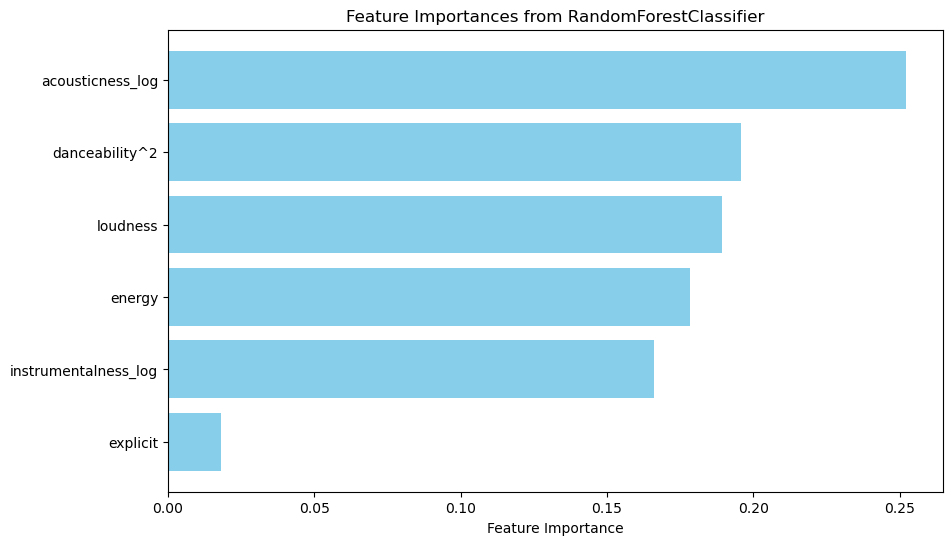

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the RandomForestClassifier from the best model
rf_model = best_model.named_steps['voting_clf'].estimators_[2]  # Access RandomForestClassifier

# Check if feature importances exist
if hasattr(rf_model, "feature_importances_"):
    # Retrieve feature importances
    feature_importances = rf_model.feature_importances_

    # Get the selected feature names from the preprocessor
    kbest = best_model.named_steps['preprocessor'].named_transformers_['quant_scaling'].named_steps['selector']
    selected_indices = kbest.get_support(indices=True)
    selected_features = [quantitative_columns[i] for i in selected_indices]

    # Combine with non-quantitative features
    feature_names = selected_features + non_quantitative

    # Sort the feature importances
    sorted_idx = np.argsort(feature_importances)[::-1]
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_importances = feature_importances[sorted_idx]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances from RandomForestClassifier')
    plt.gca().invert_yaxis()  # Invert y-axis for better visualization
    plt.show()

else:
    print("The model does not have feature importances.")

#When we dropped explicit and instrumentalness_log  from the model, the  accuracy score was abit  lower.


 ### **4.3.5 ROC AUC for Random Forest with engineered features**

In [ ]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Random Forest Classifier test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 0.89
Random Forest Classifier test ROC AUC: 0.80


## 4.4 XGBOOST with engineered features to increase the model level of accurecy

In [ ]:
######Takes over 600 minutes to run###
from sklearn.preprocessing import StandardScaler, LabelEncoder

from xgboost import XGBClassifier

# Prepare feature (X) and target (y) variables
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define quantitative and non-quantitative columns
quantitative_columns = ['duration_ms', 'energy', 'loudness', 'duration_ms_log', 'speechiness_log',
                        'acousticness_log', 'instrumentalness_log', 'tempo^2', 'danceability^2',
                        'duration_ms_energy_interaction', 'tempo_danceability_interaction']
non_quantitative = ['explicit']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('selector', SelectKBest(score_func=f_classif, k=10)),  # Select top 10 features
        ('scaler', StandardScaler())
    ]), quantitative_columns),
    ('non_quant', 'passthrough', non_quantitative)
])

# Convert y to numeric using LabelEncoder for XGBoost compatibility
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Define XGBoost Pipeline
xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=1))
])

# Define parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}

# GridSearchCV for XGBoost
grid_search = GridSearchCV(xgboost_pipeline, param_grid, cv=5, n_jobs=-1, error_score='raise', verbose=3)

# Fit XGBoost with numeric y
grid_search.fit(X_train, y_train_numeric)

# Get the best model after GridSearchCV
best_xgboost_model = grid_search.best_estimator_

# Predict and evaluate XGBoost on the test set
y_pred_test = best_xgboost_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test_numeric, y_pred_test)
print(f"XGBoost Test Accuracy: {xgb_test_accuracy:.2f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
XGBoost Test Accuracy: 0.50


In [ ]:

#Evaluate XGboost results and store them:
model_metrics = {}

# 1. Evaluate the model on the training set
y_pred_train = best_xgboost_model.predict(X_train)
train_accuracy = accuracy_score(y_train_numeric, y_pred_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate the classification report for the training set as a dictionary
train_report_dict = classification_report(y_true=y_train_numeric, y_pred=y_pred_train, output_dict=True)

# 2. Evaluate the model on the test set
y_pred_test = best_xgboost_model.predict(X_test)
test_accuracy = accuracy_score(y_test_numeric, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the classification report for the test set
# Decode predictions back to original labels for better readability
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test)
y_test_labels = label_encoder.inverse_transform(y_test_numeric)

print("Test Set Classification Report:")
print(classification_report(y_true=y_test_labels, y_pred=y_pred_test_labels, target_names=label_encoder.classes_))

# 3. Store results for Precision, Recall, and F1-score
model_name = "XGBoost Classifier"

# Store train metrics
model_metrics[f"{model_name}_train"] = {
    'precision': train_report_dict['weighted avg']['precision'],
    'recall': train_report_dict['weighted avg']['recall'],
    'f1-score': train_report_dict['weighted avg']['f1-score']
}

# Store test metrics
test_report_dict = classification_report(y_true=y_test_numeric, y_pred=y_pred_test, output_dict=True)
model_metrics[f"{model_name}_test"] = {
    'precision': test_report_dict['weighted avg']['precision'],
    'recall': test_report_dict['weighted avg']['recall'],
    'f1-score': test_report_dict['weighted avg']['f1-score']
}

# Display the stored metrics
print(f"Metrics for {model_name} (Train): {model_metrics[f'{model_name}_train']}")
print(f"Metrics for {model_name} (Test): {model_metrics[f'{model_name}_test']}")


Train Accuracy: 0.65
Test Accuracy: 0.50
Test Set Classification Report:
                        precision    recall  f1-score   support

Classical/Instrumental       0.52      0.34      0.41       707
            Electronic       0.55      0.67      0.60      5752
          Folk/Country       0.39      0.31      0.34      1421
               Hip-Hop       0.38      0.08      0.13       399
            Jazz/Blues       0.53      0.18      0.26      1443
                   Pop       0.37      0.16      0.22      2397
       Reggae/Afrobeat       0.46      0.14      0.21      1116
                  Rock       0.58      0.63      0.61      4555
             Specialty       0.57      0.54      0.56      3716
                 World       0.39      0.58      0.47      4885

              accuracy                           0.50     26391
             macro avg       0.47      0.36      0.38     26391
          weighted avg       0.50      0.50      0.48     26391

Metrics for XGBoost Classifi

**Here we try to run all models together to improve the accuracy level again**

## 4.5 VOTING+RANDOM FOREST+XGBOOST:

In [ ]:
#Takes 260 min to run

# Prepare feature (X) and target (y) variables
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'energy', 'loudness', 'duration_ms_log', 'speechiness_log',
                        'acousticness_log', 'instrumentalness_log', 'tempo^2', 'danceability^2',
                        'duration_ms_energy_interaction', 'tempo_danceability_interaction']
non_quantitative = ['explicit']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('selector', SelectKBest(score_func=f_classif, k=10)),
        ('scaler', StandardScaler())
    ]), quantitative_columns),
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers
clf_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42, class_weight='balanced')
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('dt', clf_dt),
    ('rf', clf_rf),
    ('xgb', clf_xgb)
], voting='soft')

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'voting_clf__dt__max_depth': [10, 15],
    'voting_clf__dt__min_samples_split': [2, 4],
    'voting_clf__rf__n_estimators': [50, 100],
    'voting_clf__rf__max_depth': [5, 10],
    'voting_clf__xgb__n_estimators': [50, 100],
    'voting_clf__xgb__max_depth': [3, 5],
    'voting_clf__xgb__learning_rate': [0.1, 0.2]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on training and test sets
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)



Fitting 5 folds for each of 128 candidates, totalling 640 fits


Training Accuracy: 0.50
Test Accuracy: 0.45
Test Set Classification Report:
                        precision    recall  f1-score   support

Classical/Instrumental       0.35      0.46      0.40       707
            Electronic       0.58      0.57      0.58      5752
          Folk/Country       0.25      0.44      0.32      1421
               Hip-Hop       0.10      0.25      0.14       399
            Jazz/Blues       0.41      0.17      0.24      1443
                   Pop       0.29      0.23      0.26      2397
       Reggae/Afrobeat       0.23      0.30      0.26      1116
                  Rock       0.59      0.60      0.59      4555
             Specialty       0.58      0.47      0.52      3716
                 World       0.41      0.39      0.40      4885

              accuracy                           0.45     26391
             macro avg       0.38      0.39      0.37     26391
          weighted avg       0.47      0.45      0.45     26391

Confusion Matrix:
[[ 325 

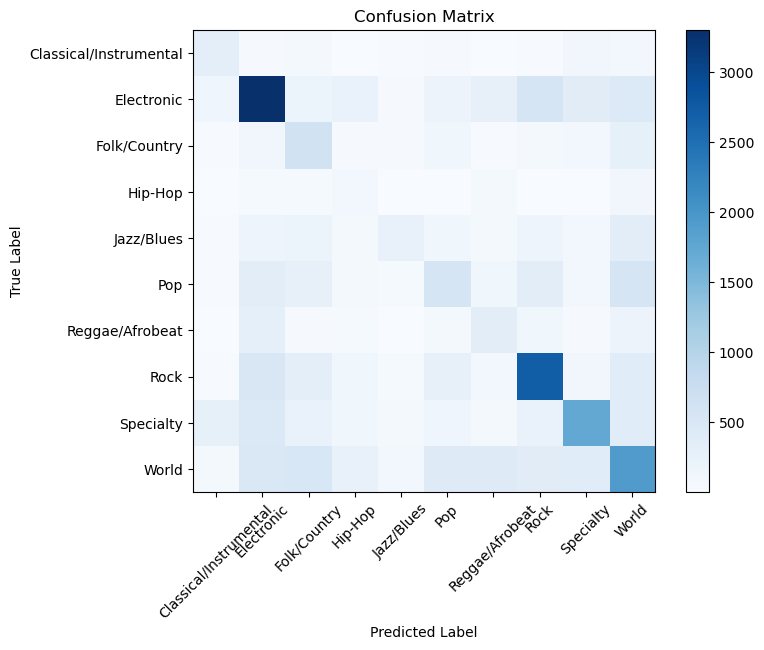

In [ ]:
# Evaluate all models together:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Report
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"XGboost+all models test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 0.87
XGboost+all models test ROC AUC: 0.82


# .5. Summarizing results for all models: original features vs. engineered features

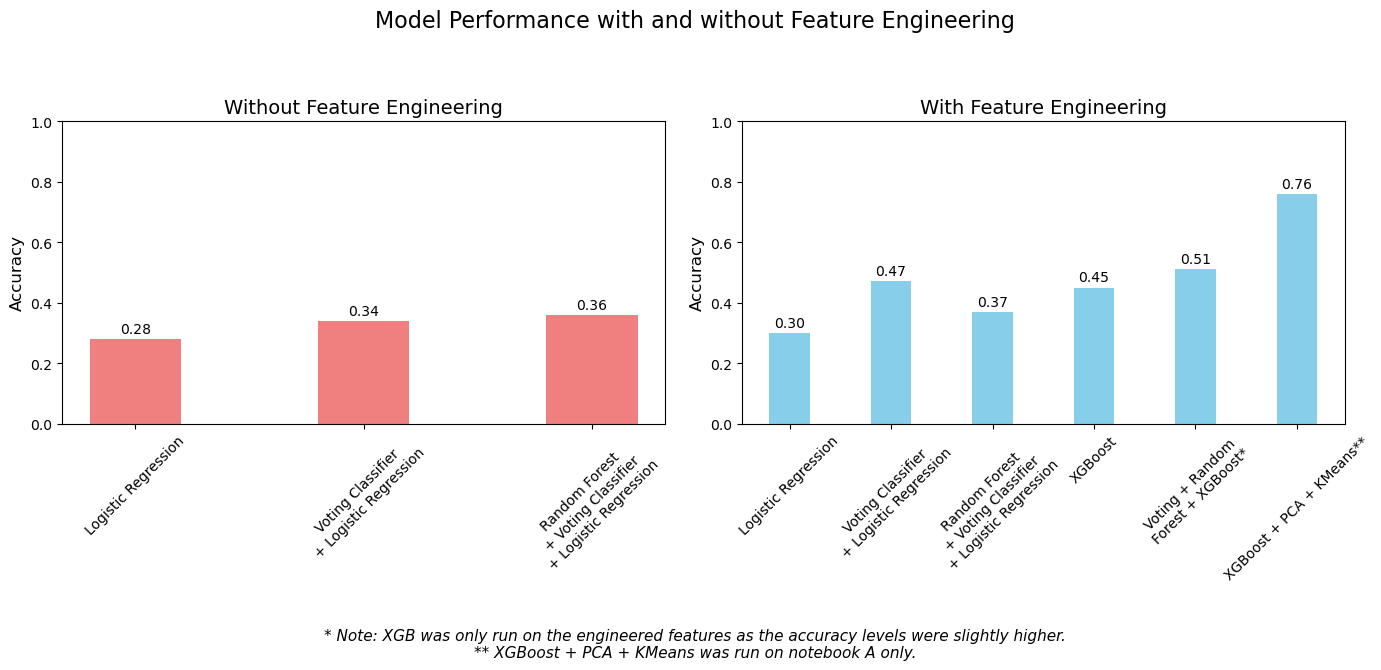

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracy values for each model (without transformed features)
accuracy_scores_1 = {
    "Logistic Regression": 0.28,
    "Voting Classifier\n+ Logistic Regression": 0.34,
    "Random Forest\n+ Voting Classifier\n+ Logistic Regression": 0.36,
}

# Accuracy values for each model (with transformed features)
accuracy_scores_2 = {
    "Logistic Regression": 0.30,
    "Voting Classifier\n+ Logistic Regression": 0.47,
    "Random Forest\n+ Voting Classifier\n+ Logistic Regression": 0.37,
    "XGBoost": 0.45,
    "Voting + Random\nForest + XGBoost*": 0.51,
    "XGBoost + PCA + KMeans**": 0.76,
}

# Setting up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Model Performance with and without Feature Engineering", fontsize=16)

# Plotting the first bar chart (Without Feature Engineering)
axes[0].bar(accuracy_scores_1.keys(), accuracy_scores_1.values(), color='lightcoral', width=0.4)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].set_title("Without Feature Engineering", fontsize=14)
axes[0].tick_params(axis='x', labelsize=10, rotation=45)

# Add accuracy values on top of each bar for the first chart
for index, value in enumerate(accuracy_scores_1.values()):
    axes[0].text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

# Plotting the second bar chart (With Feature Engineering)
axes[1].bar(accuracy_scores_2.keys(), accuracy_scores_2.values(), color='skyblue', width=0.4)
axes[1].set_ylim(0, 1)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].set_title("With Feature Engineering", fontsize=14)
axes[1].tick_params(axis='x', labelsize=10, rotation=45)

# Add accuracy values on top of each bar for the second chart
for index, value in enumerate(accuracy_scores_2.values()):
    axes[1].text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

# Adding combined note
note_text = (
    "* Note: XGB was only run on the engineered features as the accuracy levels were slightly higher.\n"
    "** XGBoost + PCA + KMeans was run on notebook A only."
)
fig.text(0.5, -0.1, note_text, ha='center', fontsize=11, style='italic')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()




